## Keras -- MLPs on MNIST

In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [9]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [0]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

<h1>1.USING TWO HIDDEN LAYERS

<h2> a.MLP + ReLU + ADAM </h2>

In [62]:
model_relu = Sequential()
model_relu.add(Dense(396, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.071, seed=None)))
model_relu.add(Dense(198, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 396)               310860    
_________________________________________________________________
dense_45 (Dense)             (None, 198)               78606     
_________________________________________________________________
dense_46 (Dense)             (None, 10)                1990      
Total params: 391,456
Trainable params: 391,456
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.2327 - acc: 0.9309 - val_loss: 0.1019 - val_acc: 0.9675
Epoch 2/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.0865 - acc: 0.9739 - val_loss: 0.0915 - val_acc: 0.9716
Epoch 3/20
60000/60000 [==============================] - 2s 31us/step 

Test score: 0.10270734503133722
Test accuracy: 0.9801


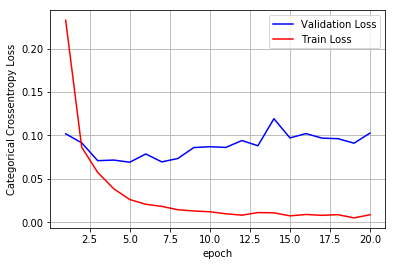

In [63]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

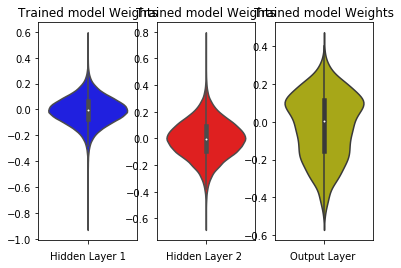

In [64]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> (b)MLP + Batch-Norm on hidden Layers + AdamOptimizer +RELU</2>

In [65]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.041  => N(0,σ) = N(0,0.041)
# h2 =>  σ=√(2/(ni+ni+1) = 0.058  => N(0,σ) = N(0,0.058)
# out =>  σ=√(2/(ni+ni+1) = 0.098  => N(0,σ) = N(0,0.98)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(396, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.041, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(198, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.58, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 396)               310860    
_________________________________________________________________
batch_normalization_9 (Batch (None, 396)               1584      
_________________________________________________________________
dense_48 (Dense)             (None, 198)               78606     
_________________________________________________________________
batch_normalization_10 (Batc (None, 198)               792       
_________________________________________________________________
dense_49 (Dense)             (None, 10)                1990      
Total params: 393,832
Trainable params: 392,644
Non-trainable params: 1,188
_________________________________________________________________


In [66]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.1936 - acc: 0.9422 - val_loss: 0.1086 - val_acc: 0.9683
Epoch 2/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.0754 - acc: 0.9774 - val_loss: 0.0879 - val_acc: 0.9732
Epoch 3/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.0486 - acc: 0.9851 - val_loss: 0.0773 - val_acc: 0.9780
Epoch 4/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.0344 - acc: 0.9895 - val_loss: 0.0825 - val_acc: 0.9768
Epoch 5/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.0253 - acc: 0.9922 - val_loss: 0.0682 - val_acc: 0.9795
Epoch 6/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.0198 - acc: 0.9940 - val_loss: 0.0832 - val_acc: 0.9756
Epoch 7/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.0150 - acc: 0.9957 - val_loss: 0.0825 - val_acc

Test score: 0.08313359864633312
Test accuracy: 0.9795


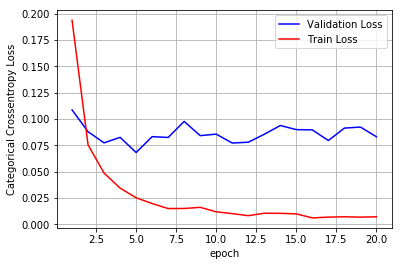

In [67]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

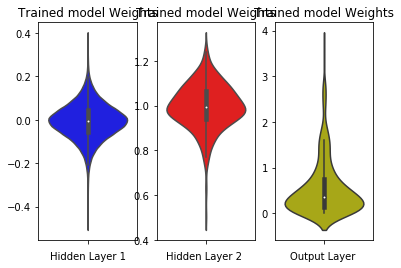

In [68]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> (c) MLP + Dropout + AdamOptimizer +Relu+BatchNormalization </h2>

In [69]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(396, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.041, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(198, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.58, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 396)               310860    
_________________________________________________________________
batch_normalization_11 (Batc (None, 396)               1584      
_________________________________________________________________
dropout_11 (Dropout)         (None, 396)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 198)               78606     
_________________________________________________________________
batch_normalization_12 (Batc (None, 198)               792       
_________________________________________________________________
dropout_12 (Dropout)         (None, 198)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 10)                1990      
Total para

In [70]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.5034 - acc: 0.8470 - val_loss: 0.1727 - val_acc: 0.9459
Epoch 2/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.2593 - acc: 0.9214 - val_loss: 0.1276 - val_acc: 0.9596
Epoch 3/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.2024 - acc: 0.9383 - val_loss: 0.1144 - val_acc: 0.9643
Epoch 4/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.1763 - acc: 0.9468 - val_loss: 0.1017 - val_acc: 0.9673
Epoch 5/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.1585 - acc: 0.9516 - val_loss: 0.0922 - val_acc: 0.9711
Epoch 6/20
60000/60000 [==============================] - 3s 51us/step - loss: 0.1445 - acc: 0.9550 - val_loss: 0.0894 - val_acc: 0.9727
Epoch 7/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.1318 - acc: 0.9594 - val_loss: 0.0817 - val_acc

Test score: 0.06723630262503284
Test accuracy: 0.981


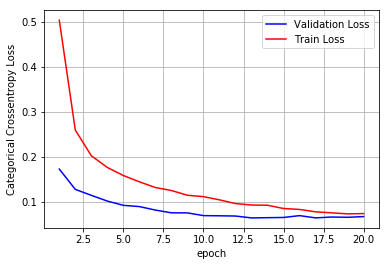

In [71]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

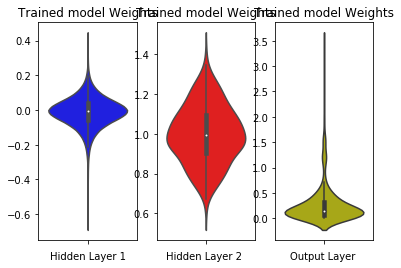

In [72]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2>  (d)MLP + Dropout + AdamOptimizer +Relu </h2>

In [73]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(396, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.071, seed=None)))
model_drop.add(Dropout(0.5))

model_drop.add(Dense(198, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)) )
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 396)               310860    
_________________________________________________________________
dropout_13 (Dropout)         (None, 396)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 198)               78606     
_________________________________________________________________
dropout_14 (Dropout)         (None, 198)               0         
_________________________________________________________________
dense_55 (Dense)             (None, 10)                1990      
Total params: 391,456
Trainable params: 391,456
Non-trainable params: 0
_________________________________________________________________


In [74]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.5392 - acc: 0.8326 - val_loss: 0.1643 - val_acc: 0.9499
Epoch 2/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.2342 - acc: 0.9297 - val_loss: 0.1232 - val_acc: 0.9626
Epoch 3/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.1814 - acc: 0.9465 - val_loss: 0.1045 - val_acc: 0.9662
Epoch 4/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.1540 - acc: 0.9553 - val_loss: 0.0877 - val_acc: 0.9716
Epoch 5/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.1323 - acc: 0.9598 - val_loss: 0.0812 - val_acc: 0.9745
Epoch 6/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.1158 - acc: 0.9652 - val_loss: 0.0742 - val_acc: 0.9749
Epoch 7/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.1055 - acc: 0.9674 - val_loss: 0.0783 - val_acc

Test score: 0.06173285202749103
Test accuracy: 0.9822


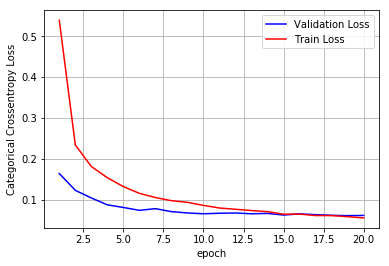

In [75]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

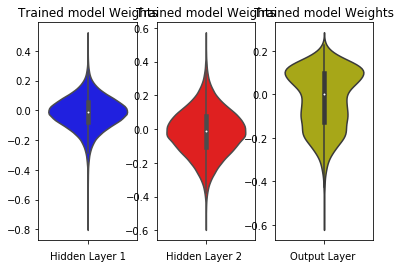

In [76]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h1>2.Using hidden three layers</h1>

<h2>(a) MLP + ReLU + ADAM </h2>

In [99]:
model_relu = Sequential()
model_relu.add(Dense(392, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.071, seed=None)))
model_relu.add(Dense(196, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)) )
model_relu.add(Dense(98, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.14, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 392)               307720    
_________________________________________________________________
dense_89 (Dense)             (None, 196)               77028     
_________________________________________________________________
dense_90 (Dense)             (None, 98)                19306     
_________________________________________________________________
dense_91 (Dense)             (None, 10)                990       
Total params: 405,044
Trainable params: 405,044
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.2327 - acc: 0.9298 - val_loss: 0.1094 - val_acc: 0.9663
Epoch 2/20
60000/60000 [==============================] - 2s 40us/step - los

Test score: 0.10204988605169434
Test accuracy: 0.981


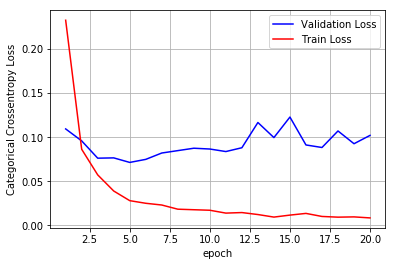

In [100]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

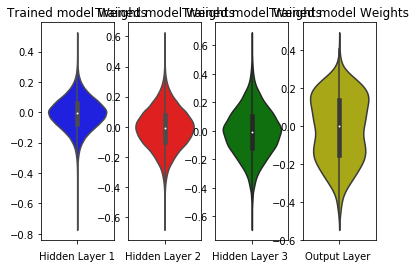

In [107]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2>(b) MLP + Batch-Norm on hidden Layers + AdamOptimizer +RELU</h2>

In [144]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.041  => N(0,σ) = N(0,0.041)
# h2 =>  σ=√(2/(ni+ni+1) = 0.058  => N(0,σ) = N(0,0.058)
# out =>  σ=√(2/(ni+ni+1) = 0.098  => N(0,σ) = N(0,0.98)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(396, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.041, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(198, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.58, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(98, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.08, seed=None)) )
model_batch.add(BatchNormalization())


model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_124 (Dense)            (None, 396)               310860    
_________________________________________________________________
batch_normalization_34 (Batc (None, 396)               1584      
_________________________________________________________________
dense_125 (Dense)            (None, 198)               78606     
_________________________________________________________________
batch_normalization_35 (Batc (None, 198)               792       
_________________________________________________________________
dense_126 (Dense)            (None, 98)                19502     
_________________________________________________________________
batch_normalization_36 (Batc (None, 98)                392       
_________________________________________________________________
dense_127 (Dense)            (None, 10)                990       
Total para

In [145]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.2091 - acc: 0.9375 - val_loss: 0.1060 - val_acc: 0.9699
Epoch 2/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.0775 - acc: 0.9766 - val_loss: 0.0932 - val_acc: 0.9693
Epoch 3/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.0520 - acc: 0.9835 - val_loss: 0.0760 - val_acc: 0.9758
Epoch 4/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.0370 - acc: 0.9884 - val_loss: 0.0805 - val_acc: 0.9743
Epoch 5/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.0315 - acc: 0.9896 - val_loss: 0.0844 - val_acc: 0.9744
Epoch 6/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.0259 - acc: 0.9915 - val_loss: 0.0762 - val_acc: 0.9775
Epoch 7/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.0220 - acc: 0.9926 - val_loss: 0.0658 - val_ac

Test score: 0.08658756976571458
Test accuracy: 0.979


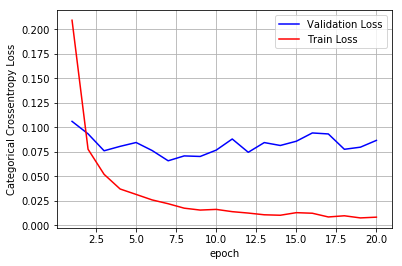

In [146]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

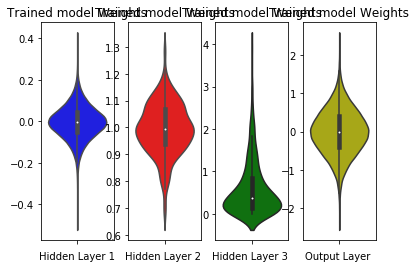

In [147]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2>  (c)MLP + Dropout + AdamOptimizer +Relu +batch</h2>

In [148]:
model_drop = Sequential()

model_drop.add(Dense(396, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.041, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(198, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.58, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(198, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.08, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_128 (Dense)            (None, 396)               310860    
_________________________________________________________________
batch_normalization_37 (Batc (None, 396)               1584      
_________________________________________________________________
dropout_29 (Dropout)         (None, 396)               0         
_________________________________________________________________
dense_129 (Dense)            (None, 198)               78606     
_________________________________________________________________
batch_normalization_38 (Batc (None, 198)               792       
_________________________________________________________________
dropout_30 (Dropout)         (None, 198)               0         
_________________________________________________________________
dense_130 (Dense)            (None, 198)               39402     
__________

In [149]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.6811 - acc: 0.7915 - val_loss: 0.1994 - val_acc: 0.9372
Epoch 2/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.3135 - acc: 0.9063 - val_loss: 0.1488 - val_acc: 0.9541
Epoch 3/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.2522 - acc: 0.9262 - val_loss: 0.1256 - val_acc: 0.9613
Epoch 4/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.2187 - acc: 0.9357 - val_loss: 0.1158 - val_acc: 0.9633
Epoch 5/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.1870 - acc: 0.9444 - val_loss: 0.1006 - val_acc: 0.9702
Epoch 6/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.1704 - acc: 0.9490 - val_loss: 0.0914 - val_acc: 0.9721
Epoch 7/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.1600 - acc: 0.9520 - val_loss: 0.0905 - val_ac

Test score: 0.07200911457028705
Test accuracy: 0.98


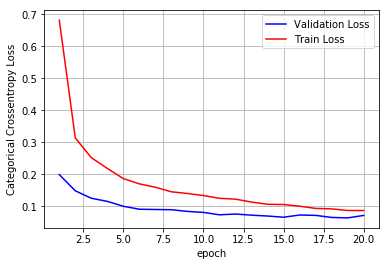

In [150]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

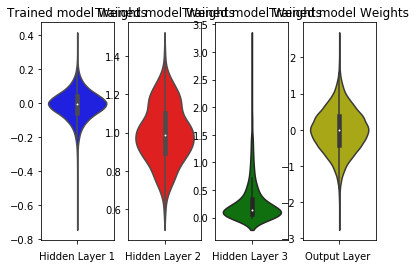

In [151]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> (d) MLP + Dropout + AdamOptimizer +Relu </h2>

In [114]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(396, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.071, seed=None)))
model_drop.add(Dropout(0.5))

model_drop.add(Dense(198, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)) )
model_drop.add(Dropout(0.5))

model_drop.add(Dense(98, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.14, seed=None)) )
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 396)               310860    
_________________________________________________________________
dropout_21 (Dropout)         (None, 396)               0         
_________________________________________________________________
dense_97 (Dense)             (None, 198)               78606     
_________________________________________________________________
dropout_22 (Dropout)         (None, 198)               0         
_________________________________________________________________
dense_98 (Dense)             (None, 98)                19502     
_________________________________________________________________
dropout_23 (Dropout)         (None, 98)                0         
_________________________________________________________________
dense_99 (Dense)             (None, 10)                990       
Total para

In [115]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.9453 - acc: 0.6996 - val_loss: 0.2284 - val_acc: 0.9359
Epoch 2/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.3629 - acc: 0.8999 - val_loss: 0.1711 - val_acc: 0.9529
Epoch 3/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.2708 - acc: 0.9277 - val_loss: 0.1486 - val_acc: 0.9585
Epoch 4/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.2256 - acc: 0.9383 - val_loss: 0.1244 - val_acc: 0.9637
Epoch 5/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.1934 - acc: 0.9485 - val_loss: 0.1097 - val_acc: 0.9702
Epoch 6/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.1753 - acc: 0.9518 - val_loss: 0.1028 - val_acc: 0.9732
Epoch 7/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.1570 - acc: 0.9579 - val_loss: 0.0989 - val_acc

Test score: 0.0779710623358118
Test accuracy: 0.9806


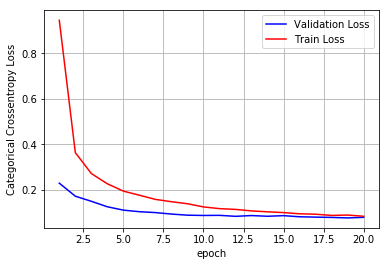

In [116]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

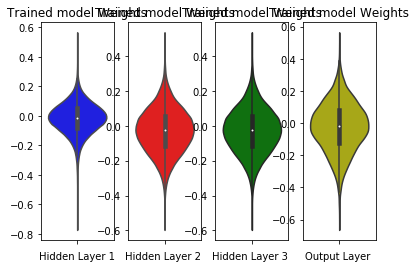

In [118]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')


plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h1>3.using five layers</h1>

<h2> (a)MLP + ReLU + ADAM </h2>

In [119]:
model_relu = Sequential()
model_relu.add(Dense(392, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.071, seed=None)))
model_relu.add(Dense(196, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)) )
model_relu.add(Dense(98, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.14, seed=None)) )
model_relu.add(Dense(49, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.2, seed=None)) )
model_relu.add(Dense(25, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.28, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 392)               307720    
_________________________________________________________________
dense_101 (Dense)            (None, 196)               77028     
_________________________________________________________________
dense_102 (Dense)            (None, 98)                19306     
_________________________________________________________________
dense_103 (Dense)            (None, 49)                4851      
_________________________________________________________________
dense_104 (Dense)            (None, 25)                1250      
_________________________________________________________________
dense_105 (Dense)            (None, 10)                260       
Total params: 410,415
Trainable params: 410,415
Non-trainable params: 0
_________________________________________________________________
None

Test score: 0.10375401149833269
Test accuracy: 0.9776


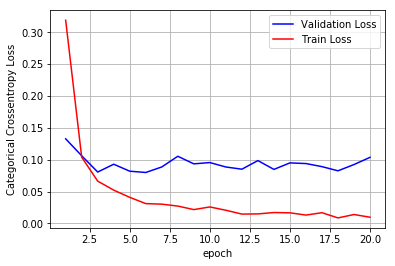

In [120]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

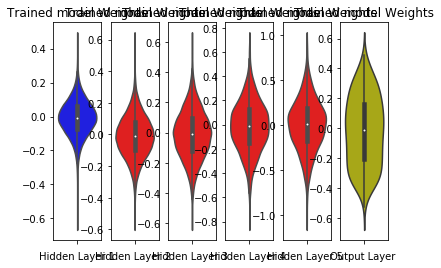

In [127]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1,6 ,5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1,6,6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> (b)MLP + Batch-Norm on hidden Layers + AdamOptimizer +RELU</h2>

In [136]:
# Multilayer perceptron

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(392, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.041, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(196, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.58, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(98, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.08, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(49, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.11, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(25, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.16, seed=None)) )
model_batch.add(BatchNormalization())


model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_112 (Dense)            (None, 392)               307720    
_________________________________________________________________
batch_normalization_29 (Batc (None, 392)               1568      
_________________________________________________________________
dense_113 (Dense)            (None, 196)               77028     
_________________________________________________________________
batch_normalization_30 (Batc (None, 196)               784       
_________________________________________________________________
dense_114 (Dense)            (None, 98)                19306     
_________________________________________________________________
batch_normalization_31 (Batc (None, 98)                392       
_________________________________________________________________
dense_115 (Dense)            (None, 49)                4851      
__________

In [137]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.2931 - acc: 0.9211 - val_loss: 0.1364 - val_acc: 0.9580
Epoch 2/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.1012 - acc: 0.9707 - val_loss: 0.1037 - val_acc: 0.9693
Epoch 3/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.0665 - acc: 0.9798 - val_loss: 0.0901 - val_acc: 0.9724
Epoch 4/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0539 - acc: 0.9829 - val_loss: 0.0897 - val_acc: 0.9719
Epoch 5/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.0414 - acc: 0.9867 - val_loss: 0.0849 - val_acc: 0.9738
Epoch 6/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.0372 - acc: 0.9885 - val_loss: 0.0930 - val_acc: 0.9743
Epoch 7/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.0307 - acc: 0.9904 - val_loss: 0.0927 - val_a

Test score: 0.0918853635030333
Test accuracy: 0.9799


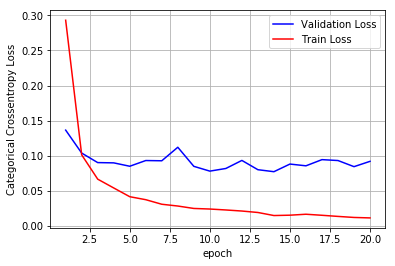

In [138]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

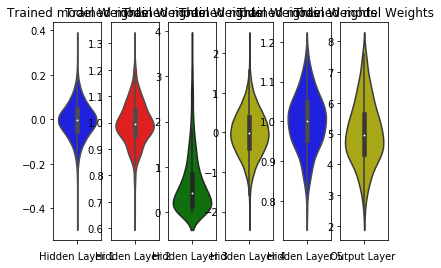

In [139]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='y')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1,6 ,5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1,6,6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2>  (c)MLP + Dropout + AdamOptimizer +Relu +batch</h2>

In [152]:
model_drop = Sequential()

model_drop.add(Dense(396, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.041, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(198, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.58, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(198, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.08, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(198, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.11, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(198, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.16, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_132 (Dense)            (None, 396)               310860    
_________________________________________________________________
batch_normalization_40 (Batc (None, 396)               1584      
_________________________________________________________________
dropout_32 (Dropout)         (None, 396)               0         
_________________________________________________________________
dense_133 (Dense)            (None, 198)               78606     
_________________________________________________________________
batch_normalization_41 (Batc (None, 198)               792       
_________________________________________________________________
dropout_33 (Dropout)         (None, 198)               0         
_________________________________________________________________
dense_134 (Dense)            (None, 198)               39402     
__________

In [153]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 196us/step - loss: 1.2813 - acc: 0.5969 - val_loss: 0.3154 - val_acc: 0.9050
Epoch 2/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.4875 - acc: 0.8544 - val_loss: 0.1973 - val_acc: 0.9420
Epoch 3/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.3567 - acc: 0.8957 - val_loss: 0.1590 - val_acc: 0.9525
Epoch 4/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.2937 - acc: 0.9160 - val_loss: 0.1432 - val_acc: 0.9587
Epoch 5/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.2639 - acc: 0.9248 - val_loss: 0.1436 - val_acc: 0.9602
Epoch 6/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.2352 - acc: 0.9354 - val_loss: 0.1306 - val_acc: 0.9639
Epoch 7/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.2151 - acc: 0.9393 - val_loss: 0.1199 - val_a

Test score: 0.083420745628234
Test accuracy: 0.9772


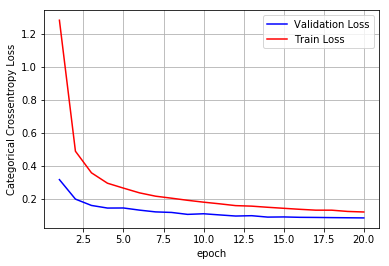

In [154]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

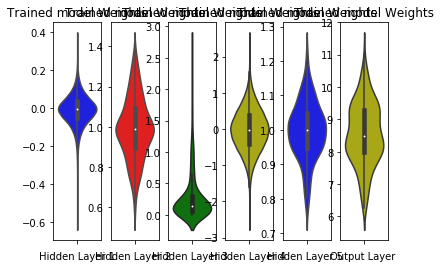

In [155]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='y')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1,6 ,5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1,6,6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2>(d)  MLP + Dropout + AdamOptimizer +Relu </h2>

In [140]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(396, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.071, seed=None)))
model_drop.add(Dropout(0.5))

model_drop.add(Dense(198, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)) )
model_drop.add(Dropout(0.5))

model_drop.add(Dense(98, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.14, seed=None)) )
model_drop.add(Dropout(0.5))

model_drop.add(Dense(98, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.2, seed=None)) )
model_drop.add(Dropout(0.5))

model_drop.add(Dense(98, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.28, seed=None)) )
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_118 (Dense)            (None, 396)               310860    
_________________________________________________________________
dropout_24 (Dropout)         (None, 396)               0         
_________________________________________________________________
dense_119 (Dense)            (None, 198)               78606     
_________________________________________________________________
dropout_25 (Dropout)         (None, 198)               0         
_________________________________________________________________
dense_120 (Dense)            (None, 98)                19502     
_________________________________________________________________
dropout_26 (Dropout)         (None, 98)                0         
_________________________________________________________________
dense_121 (Dense)            (None, 98)                9702      
__________

In [141]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 109us/step - loss: 3.0582 - acc: 0.1556 - val_loss: 1.9679 - val_acc: 0.2860
Epoch 2/20
60000/60000 [==============================] - 3s 47us/step - loss: 1.7921 - acc: 0.3399 - val_loss: 1.4082 - val_acc: 0.4728
Epoch 3/20
60000/60000 [==============================] - 3s 47us/step - loss: 1.4161 - acc: 0.4615 - val_loss: 1.1216 - val_acc: 0.5522
Epoch 4/20
60000/60000 [==============================] - 3s 49us/step - loss: 1.2070 - acc: 0.5386 - val_loss: 0.9771 - val_acc: 0.6124
Epoch 5/20
60000/60000 [==============================] - 3s 53us/step - loss: 1.0516 - acc: 0.6083 - val_loss: 0.7809 - val_acc: 0.7109
Epoch 6/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.9086 - acc: 0.6694 - val_loss: 0.6112 - val_acc: 0.7783
Epoch 7/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.7851 - acc: 0.7270 - val_loss: 0.5624 - val_ac

Test score: 0.17786330469548703
Test accuracy: 0.9567


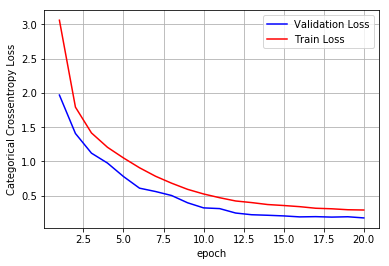

In [142]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

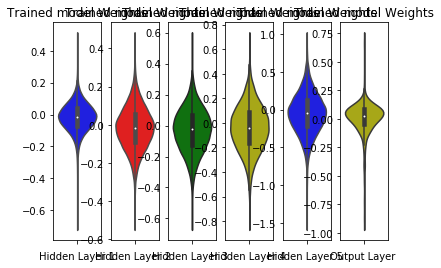

In [143]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='y')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1,6 ,5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='b')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1,6,6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h1>conclusion

* STEP1:collected mnist data
* STEP2:converted into single dimension i.e column
* STEP3:using 2/3/5 hidden layers and activation function as RELU and optimzation  as ADAM and BATCHING and DROPOUT are done for the hidden layers

In [158]:
from prettytable import PrettyTable

print("******************************using 2 hidden layers***********************************")
names = ['mlp-relu-adam','mlp-batch-adam-relu','mlp-drop-adam-relu-batch','mlp-drop-adam-relu']

acc = [98.01,97.75,98.10,98.22]

numbering = [1,2,3,4]

# Initializing prettytable
table = PrettyTable()

# Adding columns
table.add_column("S.NO.",numbering)
table.add_column("MODEL",names)
table.add_column("acc ",acc)

# Printing the Table
print(table)


print("******************************using 3 hidden layers***********************************")
names = ['mlp-relu-adam','mlp-batch-adam-relu','mlp-drop-adam-relu-batch','mlp-drop-adam-relu']

acc = [98.10,97.90,98.00,95.06]

numbering = [1,2,3,4]

# Initializing prettytable
table = PrettyTable()

# Adding columns
table.add_column("S.NO.",numbering)
table.add_column("MODEL",names)
table.add_column("acc ",acc)

# Printing the Table
print(table)


print("******************************using 5 hidden layers***********************************")
names = ['mlp-relu-adam','mlp-batch-adam-relu','mlp-drop-adam-relu-batch','mlp-drop-adam-relu']

acc = [97.76,97.99,98.72,95.67]

numbering = [1,2,3,4]

# Initializing prettytable
table = PrettyTable()

# Adding columns
table.add_column("S.NO.",numbering)
table.add_column("MODEL",names)
table.add_column("acc ",acc)

# Printing the Table
print(table)

******************************using 2 hidden layers***********************************
+-------+--------------------------+-------+
| S.NO. |          MODEL           |  acc  |
+-------+--------------------------+-------+
|   1   |      mlp-relu-adam       | 98.01 |
|   2   |   mlp-batch-adam-relu    | 97.75 |
|   3   | mlp-drop-adam-relu-batch |  98.1 |
|   4   |    mlp-drop-adam-relu    | 98.22 |
+-------+--------------------------+-------+
******************************using 3 hidden layers***********************************
+-------+--------------------------+-------+
| S.NO. |          MODEL           |  acc  |
+-------+--------------------------+-------+
|   1   |      mlp-relu-adam       |  98.1 |
|   2   |   mlp-batch-adam-relu    |  97.9 |
|   3   | mlp-drop-adam-relu-batch |  98.0 |
|   4   |    mlp-drop-adam-relu    | 95.06 |
+-------+--------------------------+-------+
******************************using 5 hidden layers***********************************
+-------+----------